In [2]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns
import sklearn

In [3]:
# use pandas to import csv file
df = pd.read_csv("realestate.csv")
# too see max columns
pd.set_option('display.max_columns',None)
# print dataframe
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,for_sale,1,1,20.20,Wilbraham,Massachusetts,1095,1751,299000
1,sold,1,2,0.28,Agawam,Massachusetts,1030,1060,300000
2,for_sale,4,2,0.16,Springfield,Massachusetts,1105,1402,199900
3,for_sale,5,1,0.13,Holyoke,Massachusetts,1040,1327,300000
4,for_sale,3,1,0.13,West Springfield,Massachusetts,1089,1715,299000
...,...,...,...,...,...,...,...,...,...
8041,for_sale,2,1,0.20,East Hartford,Connecticut,6118,1893,190000
8042,sold,4,2,0.42,Enfield,Connecticut,6082,1413,269900
8043,for_sale,5,1,0.98,Somers,Connecticut,6071,1520,349900
8044,for_sale,2,2,2.07,Haddam,Connecticut,6438,1726,799000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8046 entries, 0 to 8045
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   status      8046 non-null   object 
 1   bed         8046 non-null   int64  
 2   bath        8046 non-null   int64  
 3   acre_lot    8046 non-null   float64
 4   city        8046 non-null   object 
 5   state       8046 non-null   object 
 6   zip_code    8046 non-null   int64  
 7   house_size  8046 non-null   int64  
 8   price       8046 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 565.9+ KB


In [5]:
#New dataframe 
new_df = df
#Checking for null values 
print(new_df.isnull().sum()) 
print("Missing values distribution: ")
print(new_df.isnull().mean())

status        0
bed           0
bath          0
acre_lot      0
city          0
state         0
zip_code      0
house_size    0
price         0
dtype: int64
Missing values distribution: 
status        0.0
bed           0.0
bath          0.0
acre_lot      0.0
city          0.0
state         0.0
zip_code      0.0
house_size    0.0
price         0.0
dtype: float64


In [7]:
# #Checking for duplicates
print(new_df.duplicated().any()) 

True


In [8]:
print(new_df.duplicated())
print(new_df.shape) 

0       False
1       False
2       False
3       False
4       False
        ...  
8041    False
8042    False
8043    False
8044    False
8045    False
Length: 8046, dtype: bool
(8046, 9)


In [9]:
#Replacing string values with integer 
new_df["status"].replace({"for_sale":"0", "sold":"1"}, inplace = True) 
print(new_df.head())

  status  bed  bath  acre_lot              city          state  zip_code  \
0      0    1     1     20.20         Wilbraham  Massachusetts      1095   
1      1    1     2      0.28            Agawam  Massachusetts      1030   
2      0    4     2      0.16       Springfield  Massachusetts      1105   
3      0    5     1      0.13           Holyoke  Massachusetts      1040   
4      0    3     1      0.13  West Springfield  Massachusetts      1089   

   house_size   price  
0        1751  299000  
1        1060  300000  
2        1402  199900  
3        1327  300000  
4        1715  299000  


C:\Users\imjha\AppData\Local\Temp\ipykernel_6504\2292501783.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df["status"].replace({"for_sale":"0", "sold":"1"}, inplace = True)


In [10]:
#Finding unique values in "Region" 
print(new_df["state"].unique()) 

['Massachusetts' 'Puerto Rico' 'New York' 'Maine' 'Connecticut'
 'Rhode Island' 'Pennsylvania' 'New Hampshire']


In [11]:
#Replacing string values with int
new_df['state'].replace({'Massachusetts':'0','Puerto Rico':'1','New York':'2','Maine':' 3','Connecticut':'4','Rhode Island':'5','Pennsylvania':'6','New Hampshire':'7'}, inplace = True)
print(new_df.head())

  status  bed  bath  acre_lot              city state  zip_code  house_size  \
0      0    1     1     20.20         Wilbraham     0      1095        1751   
1      1    1     2      0.28            Agawam     0      1030        1060   
2      0    4     2      0.16       Springfield     0      1105        1402   
3      0    5     1      0.13           Holyoke     0      1040        1327   
4      0    3     1      0.13  West Springfield     0      1089        1715   

    price  
0  299000  
1  300000  
2  199900  
3  300000  
4  299000  


C:\Users\imjha\AppData\Local\Temp\ipykernel_6504\3517597274.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['state'].replace({'Massachusetts':'0','Puerto Rico':'1','New York':'2','Maine':' 3','Connecticut':'4','Rhode Island':'5','Pennsylvania':'6','New Hampshire':'7'}, inplace = True)


In [12]:
#Describing data after preprocessing 
print(new_df.shape) 
print(new_df.head())

(8046, 9)
  status  bed  bath  acre_lot              city state  zip_code  house_size  \
0      0    1     1     20.20         Wilbraham     0      1095        1751   
1      1    1     2      0.28            Agawam     0      1030        1060   
2      0    4     2      0.16       Springfield     0      1105        1402   
3      0    5     1      0.13           Holyoke     0      1040        1327   
4      0    3     1      0.13  West Springfield     0      1089        1715   

    price  
0  299000  
1  300000  
2  199900  
3  300000  
4  299000  


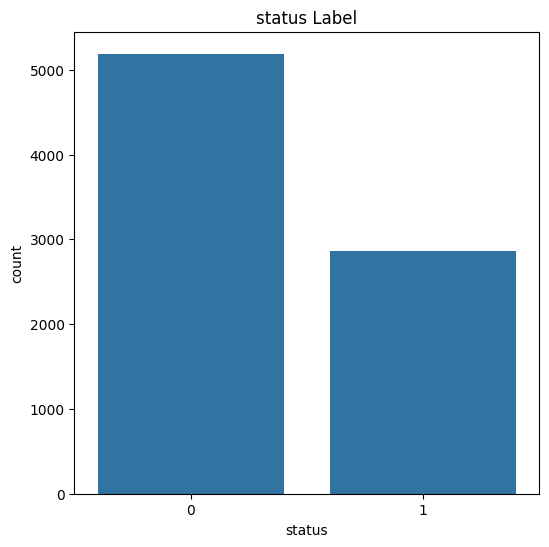

In [16]:

new_df.status.value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='status', data=new_df)
plt.title('status Label')
plt.show()

In [1]:
import pandas as pd
from sklearn.datasets import make_classification

# Load the real estate dataset
df = pd.read_csv("realestate.csv")

# Define parameters for synthetic data generation
n_samples = len(df)  # Use the same number of samples as the original dataset
n_features = len(df.columns)  # Use the same number of features as the original dataset

# Generate synthetic data
X_synthetic, y_synthetic = make_classification(
    n_classes=2,
    class_sep=0.5,
    weights=[0.05, 0.95],
    n_informative=n_features,
    n_redundant=0,
    flip_y=0,
    n_features=n_features,
    n_clusters_per_class=1,
    n_samples=n_samples,
    random_state=10
)

# Create a DataFrame for the synthetic data
synthetic_df = pd.DataFrame(X_synthetic, columns=df.columns)

# Assign synthetic labels to the 'price' column
synthetic_df['price'] = y_synthetic

# Save the synthetic dataset to a new CSV file
synthetic_df.to_csv("synthetic_realestate.csv", index=False)

print("Synthetic real estate data has been generated and saved to synthetic_realestate.csv")


C:\Users\imjha\AppData\Local\Temp\ipykernel_12464\1882945463.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Synthetic real estate data has been generated and saved to synthetic_realestate.csv


In [6]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [10]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (700, 2)
Number transactions y_train dataset:  (700,)
Number transactions X_test dataset:  (300, 2)
Number transactions y_test dataset:  (300,)
